## Problem Statement

- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the quality of the review given by other Yelp Users. 

- The objective is to predict the star rating for given text review, using Natural Language Processing Techniques

## Library imports

In [81]:
# libraries to read the data and perform mathematical operations
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries to visualize the text data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# library to split the dataset into training and test sets
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.utils.class_weight import compute_class_weight

# importing the string class to remove punctuation
import string

#import the nltk corpus to get the stopwords
from nltk.corpus import stopwords

# libary to convert the string data to numeric array
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# library to perform the actual classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold

# importing libraries to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

## Reading the data

In [2]:
data = pd.read_csv('yelp.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
data.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [5]:
data.tail(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [6]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
data.describe(include = object)

,business_id,date,review_id,text,type,user_id
count,10000,10000,10000,10000,10000,10000
unique,4174,1995,10000,9998,1,6403
top,ntN85eu27C04nwyPa8IHtw,2011-03-28,FY9nJO7BnhG3yeXicDgEjw,This review is for the chain in general. The l...,review,fczQCSmaWF78toLEmb0Zsw
freq,37,21,1,2,10000,38


In [8]:
# extracting the year from the date column and storing it
data['year'] = data['date'].apply(lambda x : x.split('-')[0]).astype('int')

In [9]:
# removing the date column as it is no longer useful
data.drop(columns = 'date', inplace = True)

In [10]:
data['year'].value_counts().sort_index()

2005       4
2006      55
2007     285
2008     765
2009    1171
2010    1852
2011    2791
2012    3025
2013      52
Name: year, dtype: int64

In [11]:
data['type'].value_counts()

review    10000
Name: type, dtype: int64

In [12]:
# as the columns business_id and review_id contain identifying values, so removing the same.
# Also removing the type column as it contains only 1 value

## Visualizing the dataset

In [13]:
data['review_length'] = data['text'].apply(len)

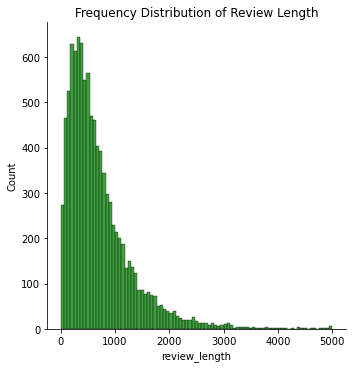

In [14]:
sns.displot(data = data, x  = 'review_length', color='green')
plt.title("Frequency Distribution of Review Length")
plt.show()

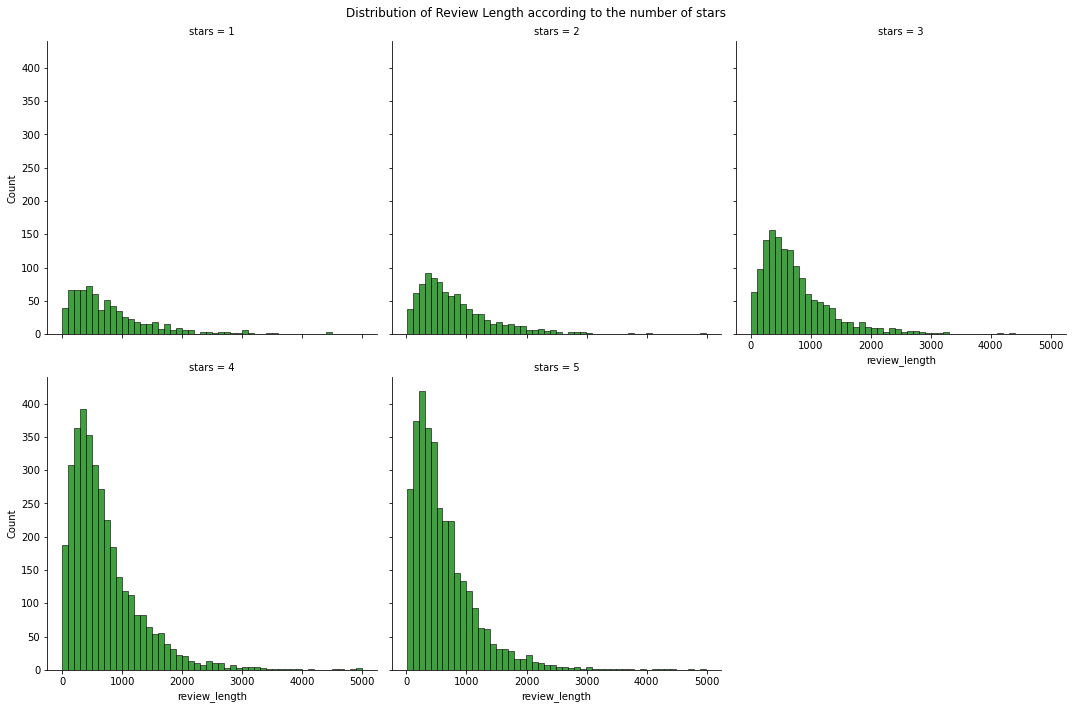

In [15]:
sns.displot(data = data, col = 'stars', x = 'review_length', palette= 'rainbow', bins = 50, col_wrap=3, color='green')
plt.suptitle('Distribution of Review Length according to the number of stars')
plt.tight_layout()
plt.show()

In [16]:
# checking the summary statistics for the review length feature
data['review_length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: review_length, dtype: float64

In [17]:
# checking the longest review
data[data['review_length'] == data['review_length'].max()]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [18]:
# checking a review with the mean length
data[data['review_length'] == 711]['text'].iloc[0]

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

In [19]:
# checking the shortest review
data[data['review_length'] == data['review_length'].min()]['text'].iloc[0]

'X'

In [20]:
# checking the distribution of the number of stars in the dataframe

stars_percent = pd.DataFrame(data['stars'].value_counts().sort_index()/len(data) * 100)
stars_percent.rename(columns = {'stars':'Percentage'}, inplace = True)

stars_count = pd.DataFrame(data['stars'].value_counts().sort_index())
stars_count.rename(columns = {'stars':'Count'}, inplace = True)

df_stars_dist = pd.concat([stars_count, stars_percent], axis = 1)
df_stars_dist.index.name = 'Stars'

df_stars_dist.T

Stars,1,2,3,4,5
Count,749.00,927.00,1461.00,3526.00,3337.00
Percentage,7.49,9.27,14.61,35.26,33.37


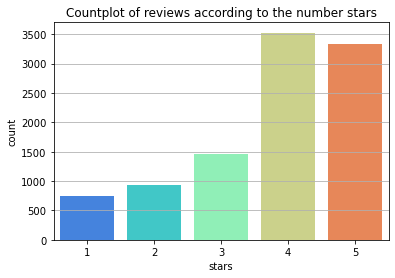

In [21]:
# visualizing the number of stars in the dataset
plt.grid()
sns.countplot(x = 'stars', data = data, palette='rainbow')
plt.title("Countplot of reviews according to the number stars")
plt.show()

In [74]:
# using wordcloud to visualise the text data

# creating a single string of all the reviews to be fed into the wordcloud
word_cloud_text = " ".join(review for review in data['text'].astype(str))

# storing the stopwords in a set to be passed to the WordCloud constructor
stopwords = set(STOPWORDS)

# Creating the wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(word_cloud_text)

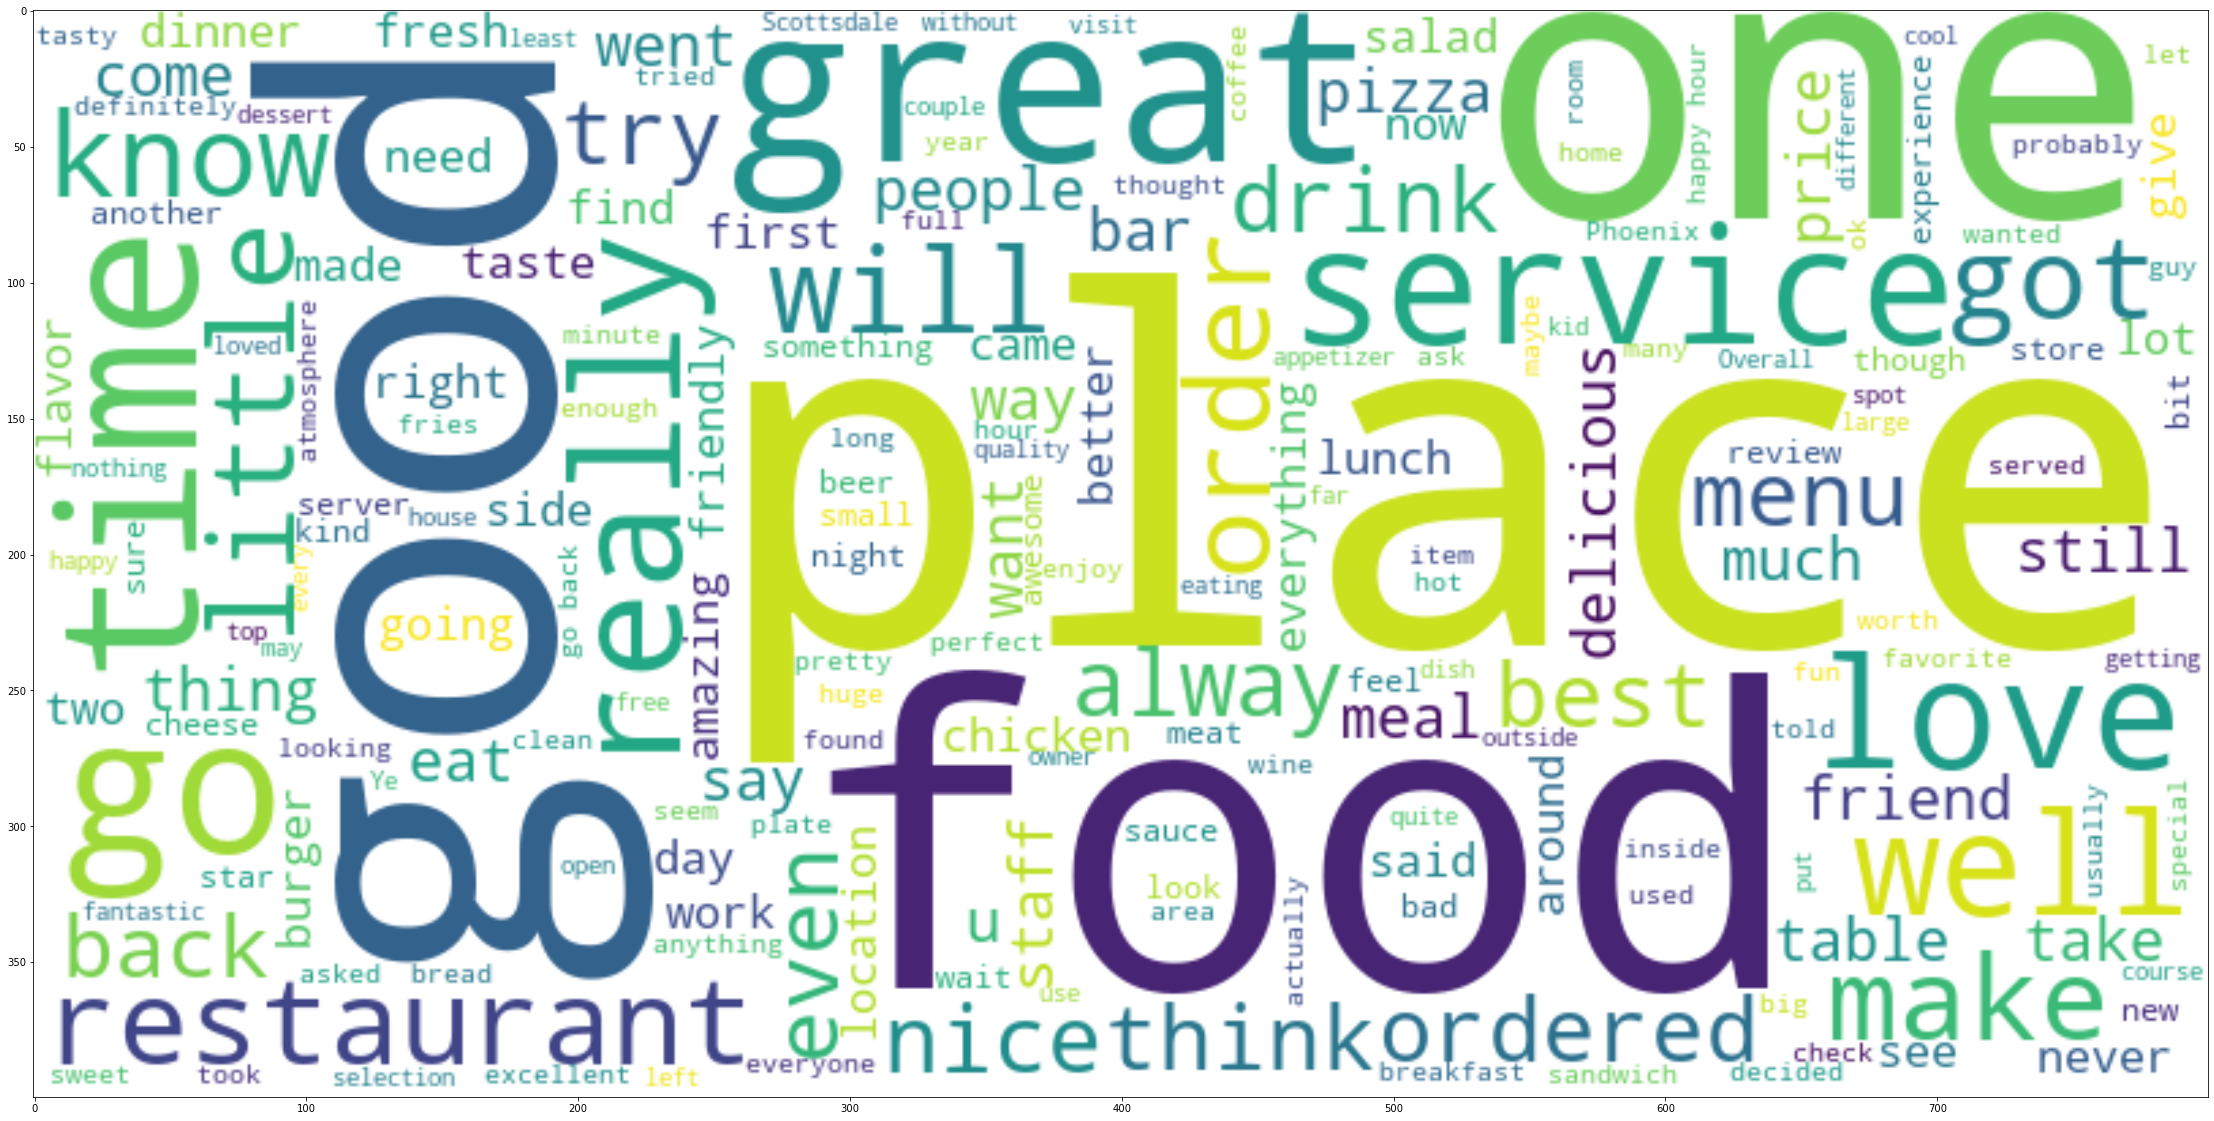

In [73]:
plt.figure( figsize=(40,20))

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

## Data Preprocessing

In [22]:
# Step1: Removing the punctuation
i = np.random.randint(data.shape[0])
test_data = data['text'][i]
new_text = ''.join([character for character in test_data if character not in string.punctuation])
new_text

'The food is good atmosphere a little strange and the prices a tad high for what you get  Got a sandwich and a salad  The sandwich was good but it was just that a sandwich  No accessories  The salad was also good but it could have really used a meat on top  You had the option but the salad was already a bit pricey to begin with and adding meat would have made it over a 10 saladfor lunch'

In [23]:
# Step2: Removing the stopwords
tokens = [word for word in new_text.lower().split() if word not in stopwords.words('english')]
tokens

['food',
 'good',
 'atmosphere',
 'little',
 'strange',
 'prices',
 'tad',
 'high',
 'get',
 'got',
 'sandwich',
 'salad',
 'sandwich',
 'good',
 'sandwich',
 'accessories',
 'salad',
 'also',
 'good',
 'could',
 'really',
 'used',
 'meat',
 'top',
 'option',
 'salad',
 'already',
 'bit',
 'pricey',
 'begin',
 'adding',
 'meat',
 'would',
 'made',
 '10',
 'saladfor',
 'lunch']

In [24]:
# combining both these steps into a function in order to apply it to the dataset
def clean_text(text):
    no_punc = ''.join([character for character in text if character not in string.punctuation])
    tokens = [word for word in no_punc.lower().split() if word not in stopwords.words('english')]
    return tokens

In [25]:
# applying the clean_text function on a random text to check if the function is working properly
i = np.random.randint(data.shape[0])
dummy_text = data['text'][i]

clean_text(dummy_text)

['thank',
 'much',
 'good',
 'reviews',
 'went',
 'business',
 'meeting',
 '8132010',
 'ate',
 'soo',
 'much',
 'hurt',
 'everything',
 'great',
 'especially',
 'loved',
 'lamb',
 'chicken',
 'curry',
 'staff',
 'excellent',
 'kind',
 'recommend',
 'new',
 'favorite',
 'indian',
 'food',
 'restaurant',
 'everyone']

In [26]:
# Instantiating the CountVectorizer with the clean_text function as analyzer
vectorizer = CountVectorizer(analyzer = clean_text)

In [27]:
# applying the count vectorizer to the text data in order to convert the string to numeric values
yelp_count_vectorizer = vectorizer.fit_transform(data['text'])

In [46]:
X = yelp_count_vectorizer
label = data['stars'].values
y = label

In [29]:
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(y), y = y)
d_class_weights = dict(enumerate(class_weights))

In [30]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Training the base model

In [31]:
data['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [47]:
base_classifier = MultinomialNB()

In [48]:
base_classifier.fit(X_train, y_train)

MultinomialNB()

In [49]:
y_pred_base = base_classifier.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_base ))

              precision    recall  f1-score   support

           1       0.69      0.21      0.33       220
           2       0.19      0.04      0.06       273
           3       0.31      0.06      0.10       443
           4       0.41      0.74      0.53      1064
           5       0.58      0.51      0.54      1000

    accuracy                           0.46      3000
   macro avg       0.44      0.31      0.31      3000
weighted avg       0.45      0.46      0.41      3000



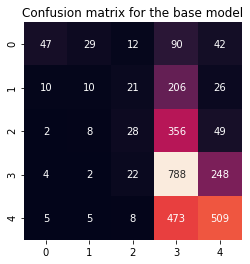

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred_base), annot = True, square = True, cbar = False, fmt = 'd')
plt.title("Confusion matrix for the base model")
plt.show()

## Making the model better

In [37]:
# since the accuracy of this classifier is very low, so using GridSearchCV in order to make the algorithm better
# using the scoring technique as roc_auc_ovr_weighted as the target class is highly imbalanced

In [38]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [39]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
param_grid_NB = {'alpha': alphas}

grid_search_NB = GridSearchCV(estimator = classifier, 
                     param_grid = param_grid_NB, 
                     cv = cv_method,
                     verbose = 1,
                     scoring = 'roc_auc_ovr_weighted')

grid_search_NB.fit(X_test, y_test)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='roc_auc_ovr_weighted', verbose=1)

In [40]:
y_pred_grid = grid_search_NB.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           1       0.99      0.94      0.96       220
           2       0.98      0.95      0.97       273
           3       0.97      0.93      0.95       443
           4       0.92      0.97      0.94      1064
           5       0.96      0.94      0.95      1000

    accuracy                           0.95      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.95      0.95      0.95      3000



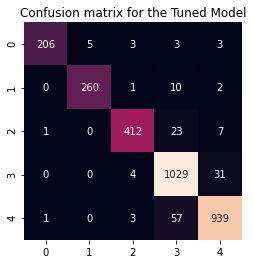

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot = True, square = True, fmt = 'd', cbar = False)
plt.title("Confusion matrix for the Tuned Model")
plt.show()

## Applying Term-Frequency Inverse Document Frequency (TF-IDF)

In [43]:
yelp_count_vectorizer.shape

(10000, 36271)

In [44]:
yelp_tf_idf = TfidfTransformer().fit_transform(yelp_count_vectorizer)
print(yelp_tf_idf.shape)

(10000, 36271)


In [45]:
print(yelp_tf_idf[:,4:6])

  (2059, 0)	0.14969033169148743
  (6897, 1)	0.11725479193907942


In [ ]:
# Applying the base model to the feature vector obtained by the TF-IDF classifier

X = yelp_tf_idf
y = label

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [51]:
base_classifier.fit(X_train, y_train)

y_pred_base_tf = base_classifier.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_base_tf))

              precision    recall  f1-score   support

           1       0.69      0.21      0.33       220
           2       0.19      0.04      0.06       273
           3       0.31      0.06      0.10       443
           4       0.41      0.74      0.53      1064
           5       0.58      0.51      0.54      1000

    accuracy                           0.46      3000
   macro avg       0.44      0.31      0.31      3000
weighted avg       0.45      0.46      0.41      3000



<AxesSubplot:>

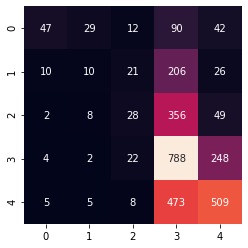

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred_base_tf), annot = True, cbar = False, square = True, fmt = 'd')

In [55]:
# Applying the model obtained after GridSearch was applied to the new feature vector

grid_search_NB.fit(X_train, y_train)
y_pred_grid_tf = grid_search_NB.predict(X_test)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [56]:
print(classification_report(y_test, y_pred_grid_tf))

              precision    recall  f1-score   support

           1       0.53      0.54      0.54       220
           2       0.35      0.26      0.30       273
           3       0.35      0.36      0.36       443
           4       0.49      0.56      0.52      1064
           5       0.60      0.55      0.57      1000

    accuracy                           0.50      3000
   macro avg       0.47      0.45      0.46      3000
weighted avg       0.50      0.50      0.49      3000



<AxesSubplot:>

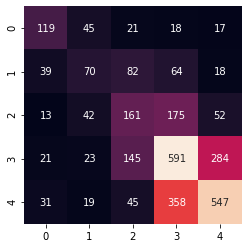

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_tf), annot = True, cbar = False, square = True, fmt = 'd')